6.299999999999999
Stable with expected benefit of 5.039999999999999 while cost is 5


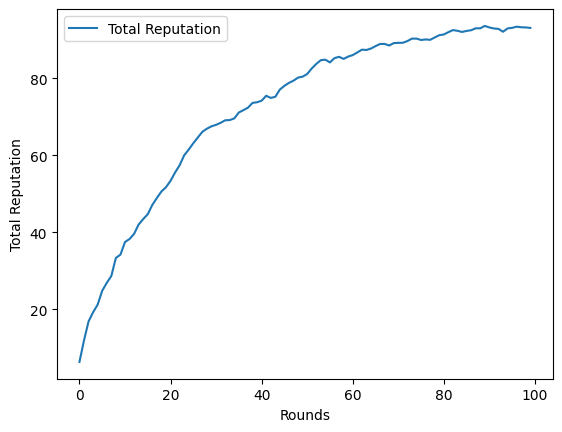

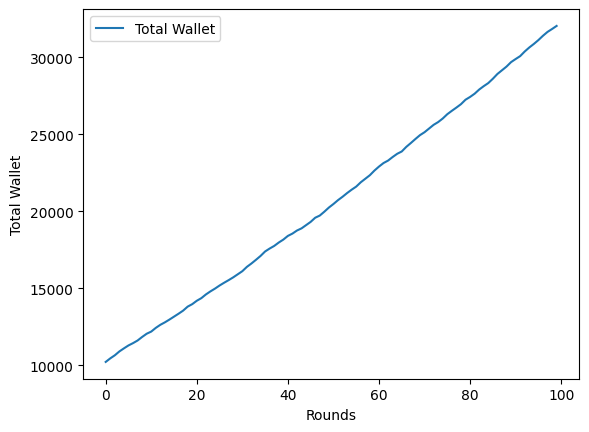

In [1]:
import numpy as np

BAD_REPUTATION_THRESH = -.5
GOOD_REPUTATION_THRESH = .5
DONATE_THRESH = -.0

PROB_POS_SUM = 0.3
POS_SUM_MULT = 3

REPUTATION_UPDATE = .2

class Player:
  def __init__(self, wallet, q):
    self.wallet = wallet
    self.reputation = 0
    self.q = q

  def donate(self, to: "Player") -> bool:
    # check if play knows the to player's reputation, the probability should be q
    perfect_information = np.random.rand() < self.q
    if perfect_information:
      if to.softmax_reputation() >= DONATE_THRESH:
        return True
      else:
        return False
    else:
      return False 

  def donate_update(self, to: "Player", did_donate: bool, c, b):
    if did_donate:
      self.wallet -= c
      # self.wallet += b
      will_positive_sum = np.random.rand() < PROB_POS_SUM
      if will_positive_sum:
        to.wallet += c*POS_SUM_MULT
      else:
        to.wallet += c
      self.reputation += REPUTATION_UPDATE
    else:
      if self.softmax_reputation() >= GOOD_REPUTATION_THRESH and to.softmax_reputation() <= BAD_REPUTATION_THRESH:
        self.reputation += 0
      else:
        self.reputation -= REPUTATION_UPDATE

  def handle_donation(self, to: "Player", c, b):
    did_donate = self.donate(to)
    self.donate_update(to, did_donate, c, b)
  

  def softmax_reputation(self):
    return softmax(self.reputation)


def softmax(x):
  return x/(1+x**2)**(1/2)
def positive_sum_b(b, prob_pos_sum, pos_sum_mult):
  return b * (prob_pos_sum*pos_sum_mult)
def validate_stability(q, b, c):
  stability = b * q > c
  if not stability:
    print("Unstable")
  else:
    print(f"Stable with expected benefit of {b * q} while cost is {c}")

# build a dict consisting of total reputation and wallet of all players
# iterate through the dict and calculate the expected benefit of each player
def get_totals(i, players: list[Player]):
  total_reputation = 0
  total_wallet = 0
  for player in players:
    total_reputation += player.softmax_reputation()
    total_wallet += player.wallet
  return {"total_reputation": total_reputation, "total_wallet": total_wallet, "round": i}

def orchestrator():
  b = 3 # base value of donation
  c = 5 # cost of donation

  prob_pos_sum = 0.7
  pos_sum_mult = 3

  pos_sum_b = positive_sum_b(b, prob_pos_sum, pos_sum_mult)

  

  print(pos_sum_b)
  q = 0.8 # probability of having reputation information
  player_count = 100
  rounds = 100

  validate_stability(q, pos_sum_b, c)

  # set players
  players: list[Player] = []
  for i in range(player_count):
    # player_q should be a normal distribution with an expected value of q
    player_q = np.random.normal(q, 0.1)
    players.append(Player(100, player_q))

  # iterate rhough all rounds iterate through all players and randomly assign a pair for each player then execute the donation with handle_donation
  totals = []
  for i in range(rounds):
    for player in players:
      to = np.random.choice(players)
      while to == player:
        to = np.random.choice(players)
      player.handle_donation(to, c, b)
    totals.append(get_totals(i, players))

  return totals







totals = orchestrator()

# show two graphs one for total reputation and one for total wallet
import matplotlib.pyplot as plt

total_reputation = [total["total_reputation"] for total in totals]
total_wallet = [total["total_wallet"] for total in totals]
rounds = [total["round"] for total in totals]

plt.plot(rounds, total_reputation, label='Total Reputation')
plt.xlabel('Rounds')
plt.ylabel('Total Reputation')
plt.legend()
plt.show()

plt.plot(rounds, total_wallet, label='Total Wallet')
plt.xlabel('Rounds')
plt.ylabel('Total Wallet')
plt.legend()
plt.show()



In [48]:
# test by creating two players
game_state = GameState(generation=1, round=1)
player1 = Player(game_state=game_state, i=1)
player2 = Player(game_state=game_state, i=2)



1_1 strategy:
{
  "thoughts": [
    "In the first round, as there is no prior information about the recipient's behavior, I will start with a small donation to test their willingness to reciprocate in the future rounds. As I gain information about their past behavior, I will adjust my donation strategy accordingly, potentially increasing it if they have shown a tendency to be generous, or decreasing it if they have been selfish. The key is to leverage the twofold return of donations while also protecting my own resources if the recipient is not likely to reciprocate."
  ],
  "strategy": "My strategy will be to start by donating 2 units in the first round and then adjust my donations based on the generosity displayed by my recipient in their previous round."
}


1_2 strategy:
{
  "thoughts": [
    "In the first round, I have no prior information about my recipient's behavior, so I should donate a moderate amount to encourage cooperation and signal trust, without risking too much of my

In [49]:
player1.execute_donation(player2, game_state)



1_1 donation:
{
  "thoughts": [
    "I recall my strategy is to donate 2 units in the first round.",
    "Since I have 10 units and this is my first round, I will stick to my original plan without any adjustments, as I have no prior information about 1_2's behavior.",
    "Donating 2 units will potentially yield a good return depending on how 1_2 behaves in future rounds."
  ],
  "donation": 0.2
}


0.2

In [50]:
print(player1.wallet)
print(player2.wallet)

8.0
14.0
